In [1]:
import json
import subprocess

import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def run(cmd):
    """run cmd returns output"""
    result = subprocess.run(
        cmd, shell=True, check=True, capture_output=True, text=True)
    return result.stdout

def get_history(package):
    revisions = run("git log --format=%H top-pypi-packages-30-days.json")

    hist = []

    for rev in reversed(revisions.splitlines()):
        rev_data = run(f"git show {rev}:top-pypi-packages-30-days.json")
        data = json.loads(rev_data)
        if 'last_update' not in data:
            continue # ignore first revision wihtout date
        date = data['last_update'][:10]
        entry = {'date': date}
        for pos, row in enumerate(data['rows'], 1):
            if row['project'] == package:
                entry['pos'] = pos
                entry['num'] = row['download_count']
                # print(f"{date} => {pos}: {row['download_count']}")
        entry['thousand'] = data['rows'][999]['download_count']
        entry['twothousand'] = data['rows'][1999]['download_count']
        entry['half'] = data['rows'][2499]['download_count']
        entry['last'] = data['rows'][4999]['download_count']
        hist.append(entry)
    return hist



In [3]:
package = 'doit'
hist = get_history(package)
# plot
df = pd.DataFrame(hist)


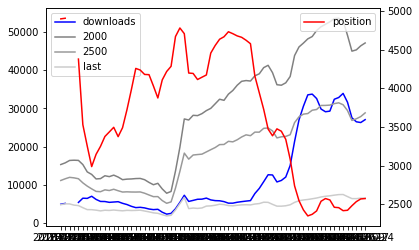

In [4]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df.date, df.num, 'b', label='downloads')
#ax1.plot(df.date, df.thousand, color='0.3')
ax1.plot(df.date, df.twothousand, color='0.5', label='2000')
ax1.plot(df.date, df.half, color='0.6', label='2500')
ax1.plot(df.date, df['last'], color='0.8', label='last')
ax2.plot(df.date, df.pos, 'r', label='position')
ax1.legend()
ax2.legend()

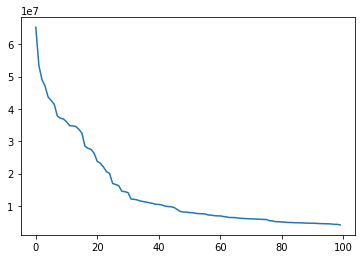

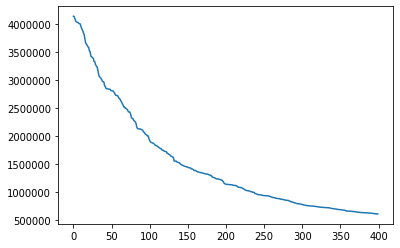

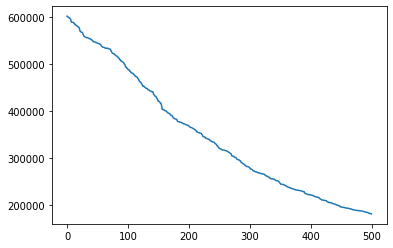

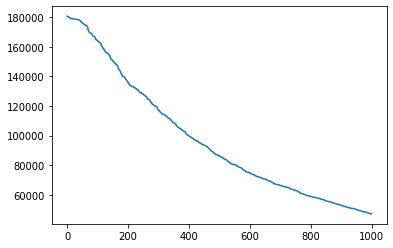

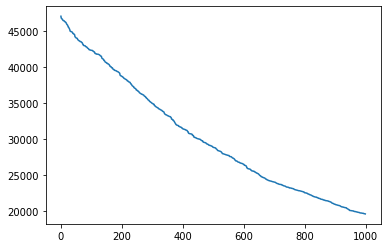

In [5]:
with open('top-pypi-packages-30-days.json') as fp:
    data = json.load(fp)
downloads = [r['download_count'] for r in data['rows']]
g1 = 100
g2 = 500
g3 = 1000
g4 = 2000
g5 = 3000
plt.figure()
plt.plot(downloads[:g1])
plt.figure()
plt.plot(downloads[g1:g2])
plt.figure()
plt.plot(downloads[g2:g3])
plt.figure()
plt.plot(downloads[g3:g4])
plt.figure()
plt.plot(downloads[g4:g5])